Com conseguir fringerprints?

Comparar fringerprints MACCS i fringerprints Morgan

Quins són els fàrmacs més similars ?

Tenen la mateixa funció ? 

Són actius per a les mateixes proteïnes ?

Quina és la seva similitud amb metadona ?

### 1. Càlcul de la similitud amb morfina utilitzant fingerprints MACCS i Morgan amb RDKit:

In [1]:
from rdkit import Chem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import DataStructs
from rdkit.Chem import MolFromSmiles
from rdkit.Chem import SDMolSupplier
from rdkit.Chem import MolToSmiles 

In [2]:
# Desactivem els warnings i errors de rdkit per una major claredat en el notebook.
from rdkit import rdBase
rdBase.DisableLog('rdApp.warning')
rdBase.DisableLog('rdApp.error')

In [3]:
supplier = Chem.SDMolSupplier('./drugbank_approved_structures.sdf')

Aconseguir morphine de l'arxiu de DrugBank.

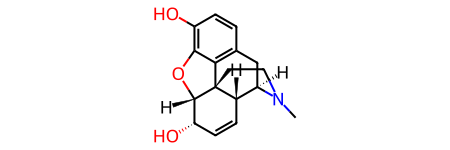

In [4]:
molecules = [mol for mol in supplier if mol is not None]

# Cerca la morfina entre les molècules
for mol in molecules:
    if mol.GetProp('GENERIC_NAME') == 'Morphine':
        break
morphine = mol
morphine
# type(morphine)

Funcions per calcular i comparar fringerprints:

In [5]:
def calcula_maccs_fringerprint(mol):
    fp = MACCSkeys.GenMACCSKeys(mol)
    return (fp)
def calcula_morgan_fringerprint(mol):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    return (fp)
def comparar_fingerprints(fp1, fp2):
    similitud = DataStructs.TanimotoSimilarity(fp1, fp2)
    return similitud

Fringerprints de la morfina:

In [6]:
maccs_morphine = calcula_maccs_fringerprint(morphine)
morgan_morphine = calcula_morgan_fringerprint(morphine)
# list(maccs_morphine)

#### Trobant les Molècules Més Semblants a la Morfina amb Fingerprints MACCS

In [7]:
# calcula les similituds entre les molècules i la morfina utilitzant empremtes MACCS, ordena les molècules segons aquestes similituds de més a menys semblants, 
# i mostra els noms i puntuacions de similitud de les cinc molècules més semblants.
llista_similituds_maccs = []
molecules_sorted_bySimilarity = []
for mol in molecules:
    maccs_mol = calcula_maccs_fringerprint(mol)
    similarity = comparar_fingerprints(maccs_morphine, maccs_mol)
    llista_similituds_maccs.append(similarity)
    molecules_sorted_bySimilarity.append((similarity, mol))

# .sort() ordena dins de la llista i sorted(llist) retorna una llista ordenada, pt s'hauria de guardar en una variable
# Si la similitud es 1 significa que és igual i si es 0 significa que la molècula amb la que la compares és completament diferent
molecules_sorted_bySimilarity.sort(key=lambda x: x[0], reverse=True)

for idx in range(5):
    similarity, mol = molecules_sorted_bySimilarity[idx]
    print(f"Molecule Name: {mol.GetProp('GENERIC_NAME')}\t\t Similarity Score: {similarity}")

Molecule Name: Morphine		 Similarity Score: 1.0
Molecule Name: Codeine		 Similarity Score: 0.94
Molecule Name: Hydromorphone		 Similarity Score: 0.8823529411764706
Molecule Name: Dihydrocodeine		 Similarity Score: 0.8518518518518519
Molecule Name: Oxymorphone		 Similarity Score: 0.8392857142857143


#### Trobant les Molècules Més Semblants a la Morfina amb Fingerprints Morgan

In [8]:
llista_similituds_morgan = []
molecules_sorted_bySimilarity_morgan = []
for mol in molecules:
    morgan_mol = calcula_morgan_fringerprint(mol)
    similarity = comparar_fingerprints(morgan_morphine, morgan_mol)
    llista_similituds_morgan.append(similarity)
    molecules_sorted_bySimilarity_morgan.append((similarity, mol))

molecules_sorted_bySimilarity_morgan.sort(key=lambda x: x[0], reverse=True)

for idx in range(5):
    similarity, mol = molecules_sorted_bySimilarity_morgan[idx]
    print(f"Molecule Name: {mol.GetProp('GENERIC_NAME')}\t\t Similarity Score: {similarity}")

Molecule Name: Morphine		 Similarity Score: 1.0
Molecule Name: Codeine		 Similarity Score: 0.7592592592592593
Molecule Name: Pholcodine		 Similarity Score: 0.640625
Molecule Name: Diamorphine		 Similarity Score: 0.5538461538461539
Molecule Name: Hydromorphone		 Similarity Score: 0.5409836065573771


### 2. Funcionalitats similars? La Morfina i la Codeina tenen fingerprints MACCS i Morgan més similars

									Morphine


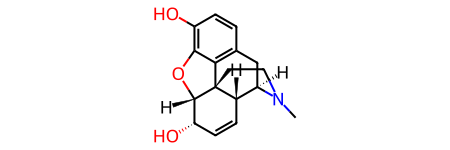

In [9]:
for m in molecules:
    if m.GetProp('GENERIC_NAME') == 'Morphine':
        break
morphine = m

print(f"\t\t\t\t\t\t\t\t\t{m.GetProp('GENERIC_NAME')}")
morphine

									Codeine


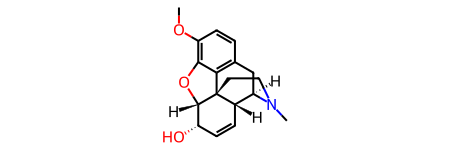

In [10]:
for mol in molecules:
    if mol.GetProp('GENERIC_NAME') == 'Codeine':
        break
codeine = mol

print(f"\t\t\t\t\t\t\t\t\t{mol.GetProp('GENERIC_NAME')}")
codeine

#### FUNCIONALITATS

Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain.

Codeine is an opioid analgesic used to treat moderate to severe pain when the use of an opioid is indicated.

### 3. Són actius per a les mateixes proteïnes, la Morfina i la Codeina?

https://go.drugbank.com/drugs/DB00295

https://go.drugbank.com/drugs/DB00318

### 4. Similitud amb metadona i la morfina

In [14]:
maccs_morphine = calcula_maccs_fringerprint(morphine)
morgan_morphine = calcula_morgan_fringerprint(morphine)

for mol in molecules:
    if mol.GetProp('GENERIC_NAME') == 'Metadona':
        break
metadona = mol
maccs_metadona = calcula_maccs_fringerprint(metadona)
morgan_metadona = calcula_morgan_fringerprint(metadona)

similarity_maccs = comparar_fingerprints(maccs_morphine, maccs_metadona)
similarity_morgan = comparar_fingerprints(morgan_morphine, morgan_metadona)

print(f"Similitud MACCS entre Morfina i Metadona: {similarity_maccs}")
print(f"Similitud Morgan entre Morfina i Metadona: {similarity_morgan}")

Similitud MACCS entre Morfina i Metadona: 0.40229885057471265
Similitud Morgan entre Morfina i Metadona: 0.09523809523809523
